In [1]:
# Install dependencies on Jupyter
%pip install nltk numpy matplotlib scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports (if running in JupyterLite this might take a while)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from scipy.integrate import odeint
# Things for preprocessing the ideas (cleaning up the text)
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# IDEA INPUT
# decide how you want to enter ideas by setting any of the following variables to True or false.
# If none of them is True, then we assume the ideas are provided in the code.

enter_ideas_manually = False
enter_ideas_from_csv = True

ideas = []
if enter_ideas_manually:
    print("Enter ideas. You can enter them one-by-one, or enter them all at once, separated with a newline. Stop by typing 'exit'")
    while answer.lower != "exit":
        answer = input()
        ideas.extend([idea for idea in answer.split('\n') if idea.strip() and idea != "exit"])

if enter_ideas_from_csv:
    import ipywidgets as widgets
    from IPython.display import display

    file_upload = widgets.FileUpload()

    display(file_upload)

FileUpload(value=(), description='Upload')

In [4]:
if enter_ideas_from_csv and len(file_upload.value) > 0:
    uploaded = file_upload.value[0]
    import codecs
    content = codecs.decode(uploaded.content, encoding="utf-8")
    ideas = content.split('\n')

In [5]:
if len(ideas) == 0:
    ideas = [
"1. To avoid the need to keep having to tell people what to do next, which is so frustrating.",
"If they find other more rewarding ventures, or their interests change or they just don't have the energy to continue. ('Rewarding' in the widest sense, i.e. financial, motivational, ...)",
"this question is too broad. perhaps the question is “why would someone who is driving an idea or vision relinquish the power to make the vision or idea manifest?” and the only reasonable answer would be if they believed that the “wisdom of the crowd” could deliver on it better than they could.",
"Because we are entering a time of collaboration and equality",
"My power comes from being seen as supporting certain goals or values (lower costs in X, support for city unions, helping validators, increasing a token price), but it's not obvious what choices ladder to those goals. I could use help in making the case that my votes are accomplishing those goals",
"Their core aspiration is about ecosystem building and enabling others",
"To reach better decisions (better = contributing more directly to the end goal)",
"buy back their time",
"Political Pressure",
"2. For the organization to do more without the leaders input. Leader only has so much capacity",
"If they feel they can trust the people to whom they're giving up power. Trust that they steer the DAO into a similar direction as they themself had envisioned.",
"again, while this questions seems too broad, the answers depend on how the power was obtained by someone in the first place. if they obtained power through a financial transaction like some DAO structures—it would likely be fear of financial loss that would drive a decision to relinquish power",
"Entering a new paradigm in the web3 space and how human behavior can be redefined by not using hierarchies as a mean of creating power",
"Some questions (those that aren't vital to my key constituents) aren't worth my time to make an informed decision. The options within a window are all acceptable to my constituents, and at that point I just want to make the larger population happy",
"There is in a place a trustworthy and transparent structure that can ensure that power is not given up but is shared",
"To make the organisation more resilient",
"focus on things only they can do or enjoy doing",
"Public Opinion",
"3. The leader becomes a conduit of other’s success, which feels good",
"If they can still continue to benefit from the project even without being in power.",
"and lastly—they would be more likely to give up power if they believed they didn’t have much power to begin—and the only way to retain whatever power they do have would be in relinquishing it so they could retain some influence",
"The new earth or the shift is creating an equality life style for humans with less stress and re evaluated that our creativity is more important.",
"For controversial topics, any choice I make will get me in trouble. Alternate mechanisms for decisions will reduce the chance that my stakeholders blame me",
"They are oblidged by others",
"To focus on a specific role which they might be better at",
"efficiency. To stop being the bottleneck",
"Moral Considerations (rarely)"
    ]
    
print('Ideas: ', ideas)

Ideas:  ['1. To avoid the need to keep having to tell people what to do next, which is so frustrating.', "If they find other more rewarding ventures, or their interests change or they just don't have the energy to continue. ('Rewarding' in the widest sense, i.e. financial, motivational, ...)", 'this question is too broad. perhaps the question is “why would someone who is driving an idea or vision relinquish the power to make the vision or idea manifest?” and the only reasonable answer would be if they believed that the “wisdom of the crowd” could deliver on it better than they could.', 'Because we are entering a time of collaboration and equality', "My power comes from being seen as supporting certain goals or values (lower costs in X, support for city unions, helping validators, increasing a token price), but it's not obvious what choices ladder to those goals. I could use help in making the case that my votes are accomplishing those goals", 'Their core aspiration is about ecosystem b

### Preprocessing steps to clean the data

[nltk_data] Downloading package punkt to /Users/jonas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


CountVectorizer graph:
211374
['#', 'Idea', 'Cos Similarity', 'Dist to centroid']
[1, 'again, while this questions seems too broad, the answers depend on how the power was obtained by someone in the first place. if they obtained power through a financial transaction like some DAO structures—it would likely be fear of financial loss that would drive a decision to relinquish power', 0.6, 0.4]
[2, 'and lastly—they would be more likely to give up power if they believed they didn’t have much power to begin—and the only way to retain whatever power they do have would be in relinquishing it so they could retain some influence', 0.55, 0.45]
[3, 'this question is too broad. perhaps the question is “why would someone who is driving an idea or vision relinquish the power to make the vision or idea manifest?” and the only reasonable answer would be if they believed that the “wisdom of the crowd” could deliver on it better than they could.', 0.52, 0.48]
[4, "My power comes from being seen as suppor

/Users/jonas/Dev/RnDAO/centroid-paulw-nextjs/api/analyzer/CountVectorizer_ideas_similarity_distance.csv

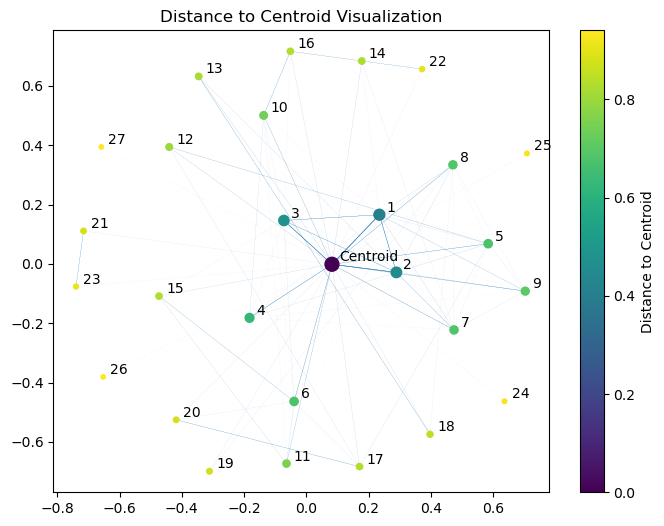

In [6]:
from Analyzer import Analyzer
from IPython.display import display, FileLink
import os
import csv

# Initialize CountVectorizer to convert text into numerical vectors
count_vectorizer = CountVectorizer()
count_analyzer = Analyzer(ideas, count_vectorizer)
count_analyzer.process_all()

file_path = os.path.join(os.getcwd(), 'CountVectorizer_ideas_similarity_distance.csv')
similarity = count_analyzer.cos_similarity
distance = count_analyzer.distance_to_centroid
with open(file_path, 'w', newline="") as f:
    writer = csv.writer(f, delimiter="|", quoting=csv.QUOTE_ALL)
    header = ["#", "Idea", "Cos Similarity", "Dist to centroid"]
    writer.writerow(header)
    print(header)
    for i, idea in enumerate(count_analyzer.ideas):
        line = [i+1, idea,round(similarity[i][0], 2), round(distance[i][0], 2)]
        writer.writerow(line)
        print(line)

local_file = FileLink(file_path, result_html_prefix="Click here to download: ")
display(local_file)


# Vectorize the text using TF-IDF
# On long ideas, this has much higher similarities than CountVectorizer 
# with minimal differences, which makes it harder to make sense of it

# tfidf_vectorizer = TfidfVectorizer()
# tfidf_analyzer = Analyzer(ideas, tfidf_vectorizer)
# tfidf_analyzer.process_all()